In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import os
import pandas as pd
from scipy.spatial import ConvexHull
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import os
import sys
sys.path.append('/workspace/utils')
from utils3d_model import load_point_clouds, display_point_clouds
from optimization_utils import objective_function, build_transformation_matrix,transform_point_cloud_numpy

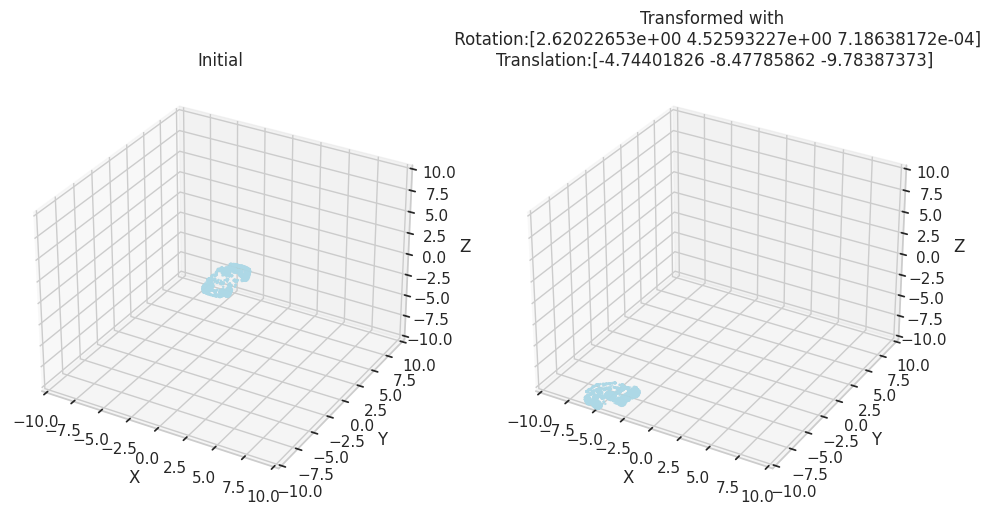

In [2]:
# Set seed for reproducibility
np.random.seed(1)

# Main execution block
folder_path = '/workspace/datasets/apollo/car_models_json'
files = os.listdir(folder_path)

# Load point clouds from specified files
point_clouds, titles = load_point_clouds(folder_path, files, len(files))
initial_pc = point_clouds["SUV"][0]  # Assuming first point cloud as the initial
reference_pc = initial_pc.copy()

# Apply a random rotation
actual_rotation = np.random.rand(3) * 2 * np.pi

# Apply a random translation within a range of 12 units per direction
actual_translation = np.random.uniform(-12, 12, 3)

# Transform the reference point cloud using the random rotation and translation
transformed_pc = transform_point_cloud_numpy(initial_pc, build_transformation_matrix(actual_rotation, actual_translation))

# Display both the initial and transformed point clouds for visual comparison
display_point_clouds([initial_pc, transformed_pc], ['Initial', f'Transformed with \n Rotation:{actual_rotation}\nTranslation:{actual_translation}'],xlim=(-10, 10), ylim=(-10, 10), zlim=(-10, 10))


In [3]:
from huggingface_hub import from_pretrained_keras

model = from_pretrained_keras("keras-io/PointNet")

2024-04-19 05:17:15.962212: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 05:17:17.563840: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using TensorFlow backend.


Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

RecursionError: maximum recursion depth exceeded in comparison